In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

#load the csv file 
df = pd.read_csv("housing.csv") 
df = df.select_dtypes(include='number')
#We dropped med house value because it is the output varibale, where the models learns from the data and produces the output, we med value isn't removed then model already knows the output and give false high accuracy outcome.
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

#split the data into train set and test set, models learns from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

median_value = X_train['total_bedrooms'].median()

X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(median_value)
X_test['total_bedrooms'] = X_test['total_bedrooms'].fillna(median_value)

#IMPORTANT STEP, SCALING
scaler = StandardScaler()
#scale the train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#first, train linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

#train ridge regression, Ridge regression keeps are the columns( features) but adds somepenalty(sum of squares of coefficients) term to the model's cost function ( shrinking of weights), this prevents overfitting and maintains stability
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

#LASSO REGRESSION, lasso regression removes unwanted features, penalty is based on the absolute values of the coefficients, this method also prevents over fitting, this performs which feature to select and which one to keep.
lasso = Lasso(alpha=10) # as alpha increases coefficients size decreases , eventually the value->zero and then the feature is removed.
lasso.fit(X_train_scaled, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


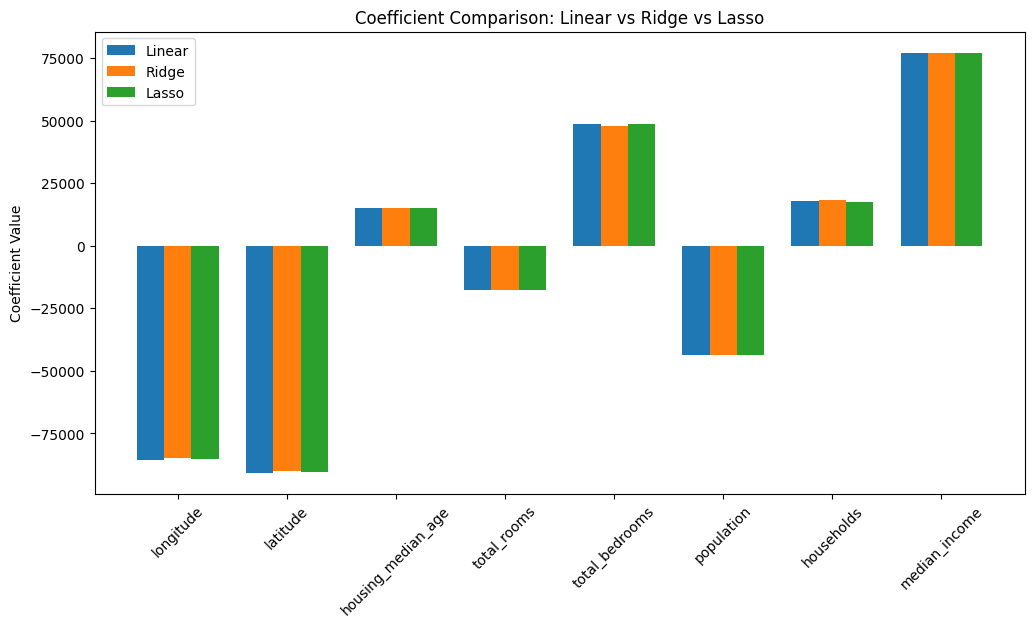

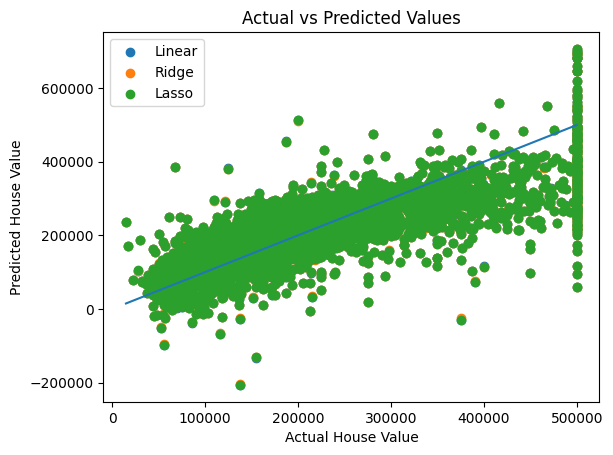

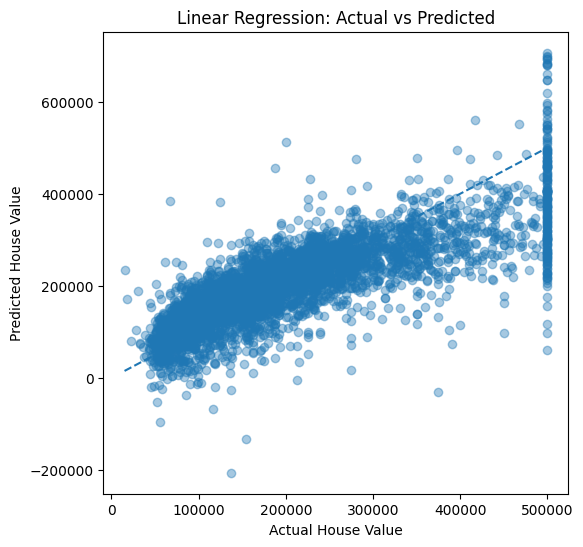

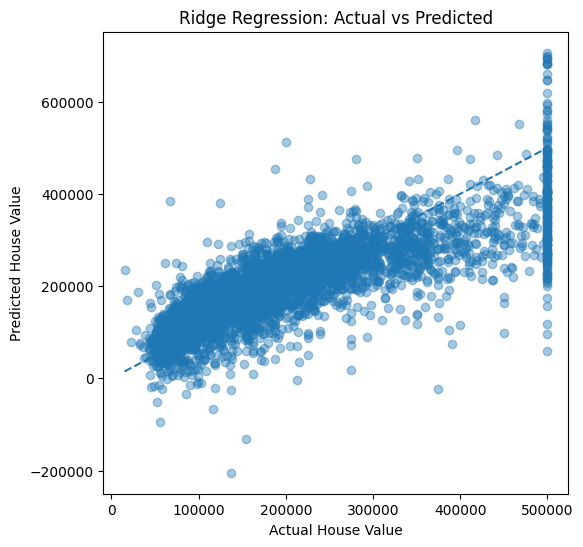

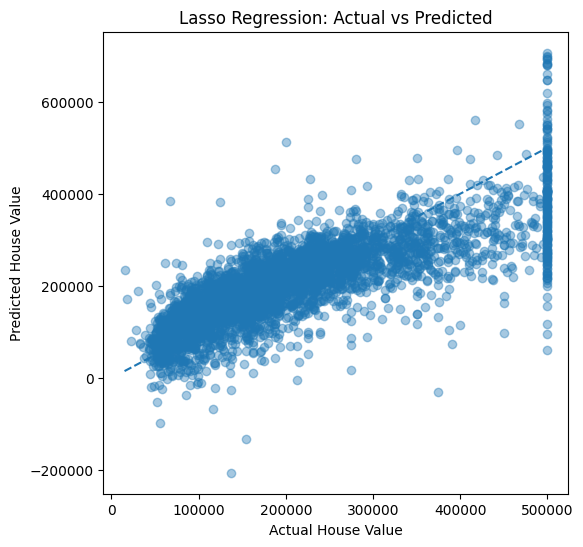

Linear MSE: 5059656033.126063
Ridge MSE: 5054897967.78787
Lasso MSE: 5058809515.541005


In [4]:
#DIAGRAMS AND VISUALIZATIONS

#bar plot of coefficients

compare = pd.DataFrame({'Feature':X.columns, 'Linear_reg': lin_reg.coef_, 'Ridge_reg': ridge.coef_, 'Lasso_reg':lasso.coef_})

x = np.arange(len(compare['Feature']))
width = 0.25

plt.figure(figsize=(12, 6))

plt.bar(x - width, compare['Linear_reg'], width, label='Linear')
plt.bar(x,         compare['Ridge_reg'],  width, label='Ridge')
plt.bar(x + width, compare['Lasso_reg'],  width, label='Lasso')

plt.xticks(x, compare['Feature'], rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.legend()

plt.show()
''' 
WHAT DOES THIS BAR PLOT SHOWS?
->Each bar height shows how important a feature is.
->Linear regression has larger coefficients because it has no regularization.
->A bar at zero height means that lasso regression sets are coefficients to zero
->Ridge regression reduces the size of the coefficients where as linear regression gives large coefficients.
->Sign of the coefficients-> +ve => if this feature increases house price increase, -ve => if this feature increase,, house price decreases.
->longitude, latitude, total_rooms, population are negatuve.
->In this case, none of the coefficients are exactly zero, which means all features contribute to predicting house prices.

'''

y_pred_lin_reg = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

plt.scatter(y_test, y_pred_lin_reg, label="Linear")
plt.scatter(y_test, y_pred_ridge, label="Ridge")
plt.scatter(y_test, y_pred_lasso, label="Lasso")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()
''' 
->Diagonal line represents perfect predictions (actual value = prediction value).
->points above the line represents over prediction where as points below the line represents under prediction.
->points close to line indicate good predictions
->The models tend to underestimate very expensive houses.
'''

#to visualise three regressions separately
#LINEAR REGRESSION
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lin_reg, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')

plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

#RIDGE REGRESSION
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')

plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

#LASSO REGRESSION
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')

plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()

''' 
->Each plot shows actual vs predicted values for one regression model.
->The diagonal line represents perfect predictions.
->Ridge regression generally shows slightly tighter clustering around the diagonal compared to linear regression.
->Lasso regression gives simpler predictions but may it have some bias.
->Finally, Ridge regression provides better generalization for this dataset.
'''

#Evaluation of models
models = {
    "Linear": lin_reg,
    "Ridge": ridge,
    "Lasso": lasso
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)   
    mse = mean_squared_error(y_test, y_pred) 
    print(name, "MSE:", mse)

#LOWER MSE means that better generalization

